### Step 1: Import Required Libraries

In [1]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os

### For installing missingno library, type this command in terminal
#pip install missingno

import missingno as msno

#Sklearn
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

import statsmodels.api as sm

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Step 2 - Data Preprocessing
- Load the data (CSV file provided)
- Understand the dataset
- Identify missing / null values
- Identify variables which will not be helpful to the model
- Handling Categorical variables
- Handling outliers

In [2]:
#Import
train_data = pd.read_csv('train.csv')

In [3]:
train_data.shape

(69999, 172)

In [4]:
train_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [5]:
train_data.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [6]:
train_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        69999 non-null  int64  
 1   circle_id                 69999 non-null  int64  
 2   loc_og_t2o_mou            69297 non-null  float64
 3   std_og_t2o_mou            69297 non-null  float64
 4   loc_ic_t2o_mou            69297 non-null  float64
 5   last_date_of_month_6      69999 non-null  object 
 6   last_date_of_month_7      69600 non-null  object 
 7   last_date_of_month_8      69266 non-null  object 
 8   arpu_6                    69999 non-null  float64
 9   arpu_7                    69999 non-null  float64
 10  arpu_8                    69999 non-null  float64
 11  onnet_mou_6               67231 non-null  float64
 12  onnet_mou_7               67312 non-null  float64
 13  onnet_mou_8               66296 non-null  float64
 14  offne

Upon initial observation, We can identify some features which don't seem to provide insightful information to the model, Let's go ahead and drop such columns.  

In [7]:
#Dropping insignificant columns from dataset
cols_to_drop = ['id','circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6'
             ,'std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8']

train_data.drop(cols_to_drop, axis=1, inplace= True)

In [8]:
train_data.shape

(69999, 161)

Now, Let's drop columns where more than 70% of the data is missing

In [9]:
cols_to_drop = train_data.columns[(100*train_data.isnull().sum()/len(train_data))>70]
print(cols_to_drop)

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object')


In [10]:
train_data.drop(cols_to_drop, axis = 1, inplace = True)

In [11]:
train_data.shape

(69999, 131)

In [12]:
train_data.head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,...,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,...,1,0,0,0,0,710,0.0,0.0,0.0,0
2,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,0.000,0.53,15.93,0.00,53.99,...,0,0,0,0,0,882,0.0,0.0,0.0,0
3,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,111.095,7.26,16.01,0.00,68.76,...,0,0,0,0,0,982,0.0,0.0,0.0,0
4,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,101.565,21.28,4.83,6.13,56.99,...,0,0,0,1,0,647,0.0,0.0,0.0,0


In [13]:
train_data.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,283.134365,278.185912,278.858826,133.153275,133.894438,132.978257,198.874771,197.153383,196.543577,9.765435,...,0.077730,0.081958,0.075344,0.081444,0.085487,1220.639709,68.108597,65.935830,60.07674,0.101887
std,334.213918,344.366927,351.924315,299.963093,311.277193,311.896596,316.818355,322.482226,324.089234,57.374429,...,0.383189,0.381821,0.573003,0.634547,0.680035,952.426321,269.328659,267.899034,257.22681,0.302502
min,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,93.581000,86.714000,84.095000,7.410000,6.675000,6.410000,34.860000,32.240000,31.575000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,197.484000,191.588000,192.234000,34.110000,32.280000,32.100000,96.480000,91.885000,91.800000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,370.791000,365.369500,369.909000,119.390000,115.837500,115.060000,232.990000,227.630000,229.345000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,7043.980000,14007.340000,2850.980000,...,16.000000,16.000000,29.000000,33.000000,41.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


We can notice that quite a few columns have 0 values, Let's go ahead and drop columns where more than 90% of the values are 0

In [14]:
cols_to_drop = train_data.columns[(train_data == 0).mean() > 0.90]
print(cols_to_drop)

Index(['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'og_others_7',
       'og_others_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8'],
      dtype='object')


In [15]:
train_data.drop(cols_to_drop, axis = 1, inplace = True)

In [16]:
train_data.shape

(69999, 117)

Let's check for Null / missing data

In [17]:
missing_percentage = (train_data.isnull().mean() * 100).round(2)
print(missing_percentage)

last_date_of_month_6    0.00
last_date_of_month_7    0.57
last_date_of_month_8    1.05
arpu_6                  0.00
arpu_7                  0.00
                        ... 
aon                     0.00
aug_vbc_3g              0.00
jul_vbc_3g              0.00
jun_vbc_3g              0.00
churn_probability       0.00
Length: 117, dtype: float64


In [18]:
for column, percentage in missing_percentage.items():
    print(f"Column '{column}': {percentage}% missing values")

Column 'last_date_of_month_6': 0.0% missing values
Column 'last_date_of_month_7': 0.57% missing values
Column 'last_date_of_month_8': 1.05% missing values
Column 'arpu_6': 0.0% missing values
Column 'arpu_7': 0.0% missing values
Column 'arpu_8': 0.0% missing values
Column 'onnet_mou_6': 3.95% missing values
Column 'onnet_mou_7': 3.84% missing values
Column 'onnet_mou_8': 5.29% missing values
Column 'offnet_mou_6': 3.95% missing values
Column 'offnet_mou_7': 3.84% missing values
Column 'offnet_mou_8': 5.29% missing values
Column 'roam_ic_mou_6': 3.95% missing values
Column 'roam_ic_mou_7': 3.84% missing values
Column 'roam_ic_mou_8': 5.29% missing values
Column 'roam_og_mou_6': 3.95% missing values
Column 'roam_og_mou_7': 3.84% missing values
Column 'roam_og_mou_8': 5.29% missing values
Column 'loc_og_t2t_mou_6': 3.95% missing values
Column 'loc_og_t2t_mou_7': 3.84% missing values
Column 'loc_og_t2t_mou_8': 5.29% missing values
Column 'loc_og_t2m_mou_6': 3.95% missing values
Column 'loc

Let's fill the missing values of numerical variables with their mean and that of categorical variables with their mode.

In [19]:
numerical_features = train_data.select_dtypes(include=['number']).columns
categorical_features = train_data.select_dtypes(include=['object']).columns

# numerical variables - fill missing values with mean
train_data[numerical_features] = train_data[numerical_features].fillna(train_data[numerical_features].mean())

# categorical variables - fill missing values with mode
train_data[categorical_features] = train_data[categorical_features].fillna(train_data[categorical_features].mode().iloc[0])

In [20]:
train_data.head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,...,0.00,0.0,0,0,0,1958,0.0,0.0,0.0,0
1,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,...,3.96,0.0,0,0,0,710,0.0,0.0,0.0,0
2,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,0.000,0.53,15.93,0.00,53.99,...,0.00,0.0,0,0,0,882,0.0,0.0,0.0,0
3,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,111.095,7.26,16.01,0.00,68.76,...,0.00,0.0,0,0,0,982,0.0,0.0,0.0,0
4,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,101.565,21.28,4.83,6.13,56.99,...,0.00,0.0,7,6,6,647,0.0,0.0,0.0,0


### Step 3: Exploratory Data Analysis

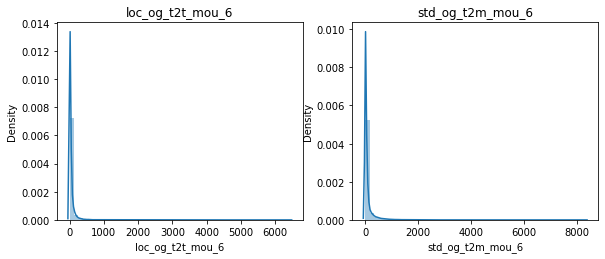

In [21]:
plt.figure(figsize=(15, 8))

plt.subplot(2,3,2)
sns.distplot(train_data.loc_og_t2t_mou_6)
plt.title('loc_og_t2t_mou_6')

plt.subplot(2,3,3)
sns.distplot(train_data.std_og_t2m_mou_6)
plt.title('std_og_t2m_mou_6')
          
plt.show()

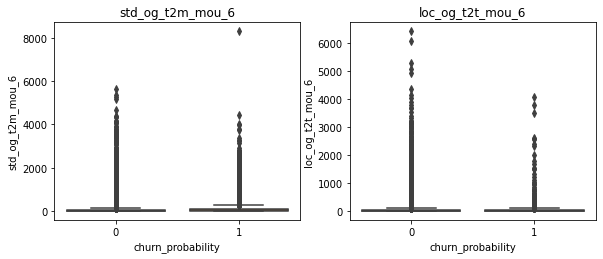

In [22]:
plt.figure(figsize=(15, 8))

plt.subplot(2,3,2)
sns.boxplot(x = train_data["churn_probability"], y = train_data["std_og_t2m_mou_6"])
plt.title('std_og_t2m_mou_6')

plt.subplot(2,3,3)
sns.boxplot(x = train_data["churn_probability"], y = train_data["loc_og_t2t_mou_6"])
plt.title('loc_og_t2t_mou_6')
          
plt.show()

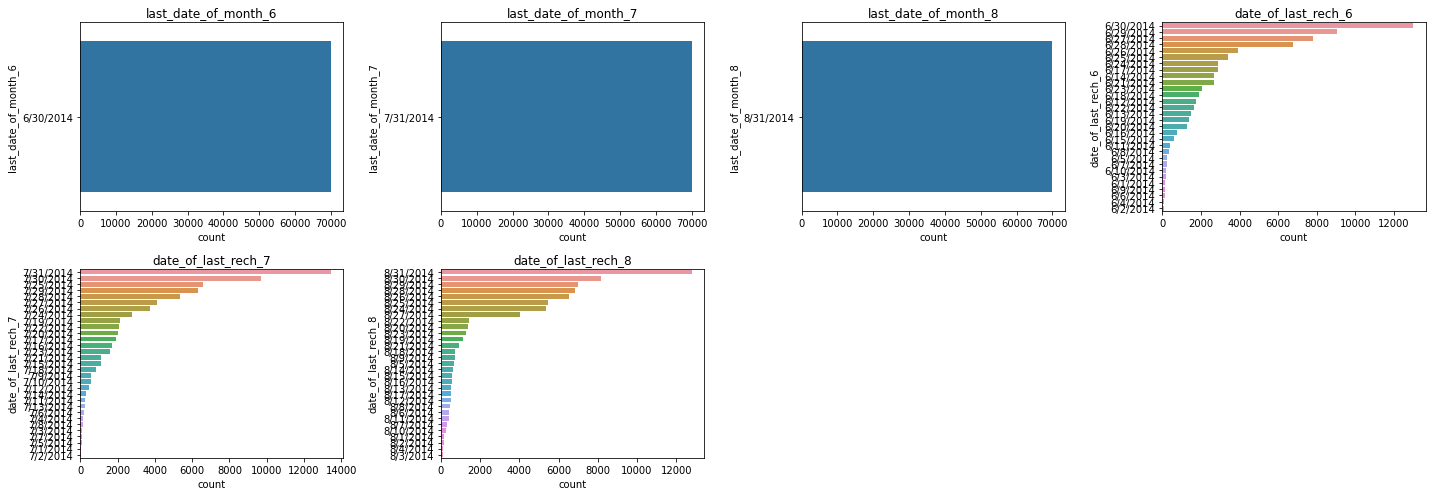

In [23]:
plt.figure(figsize=[20, 7])

# Looping through categorical variables to plot
for ind, col in enumerate(categorical_features):
    plt.subplot(2, 4, ind + 1)
    sns.countplot(y=train_data[col], data=train_data, orient='h', order=train_data[col].value_counts().index)
    plt.title(col)

plt.tight_layout()
plt.show()

These columns are not very helpful, last date is same for all columns and it's a generic behavior to recharge last day of the month. Let's go ahead and drop these categorical features as tehy are not very helpful.
Before that, Let's extract the day from these dates

In [24]:
train_data[["date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8"]] = train_data[["date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8"]].apply(pd.to_datetime)

In [25]:
train_data["day_of_last_rech_6"] = train_data['date_of_last_rech_6'].dt.day
train_data["day_of_last_rech_7"] = train_data['date_of_last_rech_7'].dt.day
train_data["day_of_last_rech_8"] = train_data['date_of_last_rech_8'].dt.day

In [26]:
train_data.drop(categorical_features, axis = 1, inplace = True)

In [27]:
train_data.shape

(69999, 114)

Correlation validation

In [28]:
train_data.corr()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_2g_7,sachet_2g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8
arpu_6,1.000000,0.743730,0.643193,0.440851,0.322178,0.261966,0.604531,0.453680,0.363763,0.128165,...,0.026238,0.029319,0.025875,0.168365,0.184225,0.217785,0.025351,0.255554,0.128352,0.103961
arpu_7,0.743730,1.000000,0.782332,0.316630,0.421673,0.335421,0.461318,0.589029,0.459456,0.096648,...,0.058365,0.044841,0.023818,0.189943,0.218318,0.171154,-0.057809,0.226730,0.228719,0.122033
arpu_8,0.643193,0.782332,1.000000,0.240991,0.321567,0.410018,0.370585,0.464738,0.579771,0.085733,...,0.031570,0.069048,0.033256,0.224868,0.177637,0.157545,-0.157566,0.157528,0.208279,0.190267
onnet_mou_6,0.440851,0.316630,0.240991,1.000000,0.733927,0.601792,0.195481,0.140202,0.116818,0.044006,...,-0.018197,-0.012180,-0.044452,-0.012144,-0.011958,-0.008242,0.058042,0.174319,0.101161,0.083735
onnet_mou_7,0.322178,0.421673,0.321567,0.733927,1.000000,0.786200,0.151701,0.189365,0.148805,0.052983,...,-0.009415,-0.004955,-0.044984,-0.009578,-0.008610,-0.011801,0.010864,0.162114,0.158068,0.103097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
jun_vbc_3g,0.217785,0.171154,0.157545,-0.008242,-0.011801,-0.006397,0.022220,0.009747,0.012275,0.025288,...,0.051045,0.040512,0.001365,0.573275,0.676636,1.000000,-0.022574,0.015872,0.000549,-0.012365
churn_probability,0.025351,-0.057809,-0.157566,0.058042,0.010864,-0.031527,0.038057,-0.010624,-0.056832,0.044874,...,-0.033270,-0.071103,-0.135177,-0.063040,-0.040102,-0.022574,1.000000,-0.026098,-0.079769,-0.071983
day_of_last_rech_6,0.255554,0.226730,0.157528,0.174319,0.162114,0.118310,0.205586,0.192902,0.133991,0.020300,...,0.118140,0.106834,-0.073954,0.013840,0.020411,0.015872,-0.026098,1.000000,0.240030,0.170188
day_of_last_rech_7,0.128352,0.228719,0.208279,0.101161,0.158068,0.146914,0.119590,0.190908,0.179090,0.004145,...,0.128059,0.114084,-0.028307,0.025629,0.014464,0.000549,-0.079769,0.240030,1.000000,0.195634


In [29]:
# plt.figure(figsize=(12, 10))
# sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
# plt.title("Correlation Matrix")
# plt.show()

As a standard practice, let's go ahead and drop columns with more than 70% correlation

In [30]:
corr_matrix = train_data.corr().abs()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
high_corr_indices = np.where(mask)
cols_to_drop = set()
for i, j in zip(*high_corr_indices):
    if i != j and corr_matrix.iloc[i, j] > 0.70:
        cols_to_drop.add(corr_matrix.columns[j])
        
print(cols_to_drop)

{'total_rech_amt_8', 'total_rech_amt_7', 'loc_ic_t2f_mou_7', 'loc_og_t2m_mou_7', 'std_ic_t2f_mou_8', 'std_og_t2t_mou_6', 'loc_og_mou_7', 'loc_ic_t2m_mou_7', 'std_og_mou_6', 'std_og_t2t_mou_7', 'sachet_2g_7', 'total_ic_mou_8', 'std_ic_t2f_mou_7', 'std_ic_mou_6', 'std_og_t2m_mou_6', 'loc_ic_mou_6', 'loc_ic_mou_8', 'std_ic_mou_7', 'loc_ic_t2t_mou_8', 'total_ic_mou_6', 'loc_og_t2t_mou_8', 'isd_ic_mou_7', 'total_og_mou_7', 'onnet_mou_8', 'loc_ic_mou_7', 'loc_og_mou_8', 'arpu_7', 'offnet_mou_8', 'loc_og_t2f_mou_7', 'offnet_mou_7', 'total_og_mou_8', 'total_rech_num_8', 'std_og_t2m_mou_7', 'loc_ic_t2m_mou_8', 'std_ic_t2m_mou_8', 'std_og_t2m_mou_8', 'loc_og_t2m_mou_8', 'isd_ic_mou_8', 'std_og_mou_7', 'vol_3g_mb_8', 'std_og_t2t_mou_8', 'total_rech_amt_6', 'std_og_t2f_mou_8', 'loc_og_t2t_mou_7', 'loc_og_mou_6', 'std_ic_mou_8', 'onnet_mou_7', 'std_og_mou_8', 'loc_ic_t2f_mou_8', 'arpu_8', 'loc_ic_t2t_mou_7', 'total_ic_mou_7', 'total_og_mou_6', 'loc_og_t2f_mou_8'}


In [31]:
train_data.drop(cols_to_drop, axis=1, inplace=True)

In [32]:
train_data.shape

(69999, 60)

<AxesSubplot:>

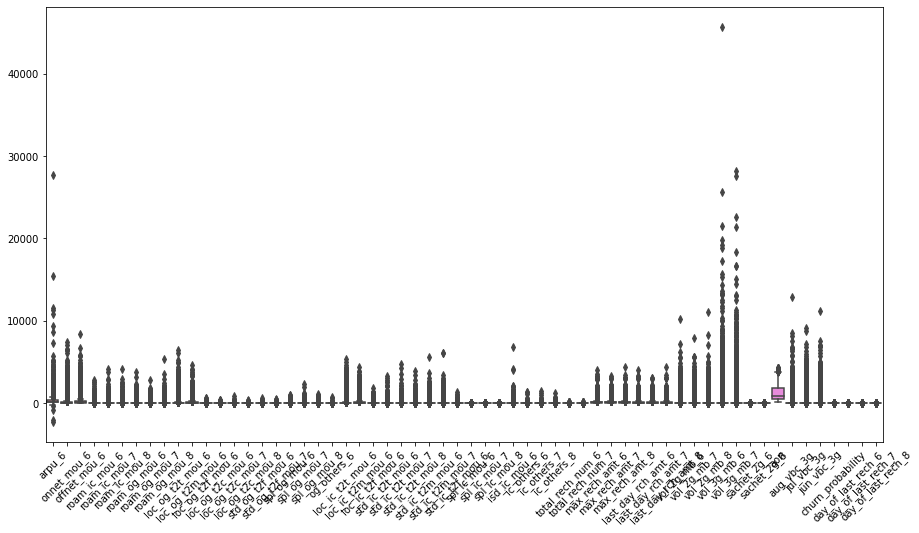

In [33]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = train_data)

### Step 4: Model Building

In [34]:
df_train, df_test = train_test_split(train_data, test_size=0.2, random_state=42, stratify=train_data. churn_probability)

### Rescaling
- Rescaling is a very important step which brings all the feature values to the same scale (within a particular range)
- Some commonly used re-scaling techniques are:
    - Min Max Scaling
        - Takes care of outliers
        - (x- xmin)/(xmax-xmin)
    - Standardisation
        - (mean=0 and sigma=1) => (x-mu)/sigma
- For this case study, Let's go with the Min Max scaling approach

In [35]:
df_train.describe()

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,...,sachet_2g_6,sachet_2g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8
count,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,...,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000
mean,283.289565,132.742100,199.412218,9.816921,6.934863,6.912036,14.080055,9.805321,9.792723,46.955092,...,0.386953,0.448490,1220.828711,67.948789,65.501282,59.718041,0.101895,24.208450,25.587439,25.630904
std,342.411676,292.931630,313.761715,56.470552,52.699618,48.900327,71.163452,56.686418,64.172627,148.484760,...,1.483941,1.633983,953.436926,271.715732,264.802536,255.285624,0.302512,6.137602,5.775030,6.090420
min,-2041.228000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,93.318000,8.110000,36.880000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.900000,...,0.000000,0.000000,468.000000,0.000000,0.000000,0.000000,0.000000,21.000000,23.000000,24.000000
50%,197.007000,37.790000,103.940000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.280000,...,0.000000,0.000000,869.000000,0.000000,0.000000,0.000000,0.000000,27.000000,27.000000,27.000000
75%,369.921000,133.153275,222.885000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.904854,...,0.000000,0.000000,1811.000000,0.000000,0.000000,0.000000,0.000000,29.000000,30.000000,30.000000
max,27731.088000,7376.710000,8362.360000,2850.980000,4155.830000,2584.810000,3775.110000,2812.040000,5337.040000,6431.330000,...,42.000000,44.000000,4337.000000,12916.220000,9165.600000,11166.210000,1.000000,30.000000,31.000000,31.000000


In [36]:
scaler = MinMaxScaler()

# Selecting cols to be scaled (excluding 'churn_probability' column)
cols_to_scale = df_train.columns[df_train.columns != 'churn_probability']
print(cols_to_scale)

# Scaling - Since it's on train data, we will do fit_transform
df_train[cols_to_scale] = scaler.fit_transform(df_train[cols_to_scale])

Index(['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
       'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7',
       'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6',
       'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6',
       'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_num_6',
       'total_rech_num_7', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'last_day_rch_amt_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8',
       'vol_3g_mb_6', 'vol_3g_mb_7', 'sach

In [37]:
df_train.describe()

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,...,sachet_2g_6,sachet_2g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8
count,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,...,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000
mean,0.078076,0.017995,0.023846,0.003443,0.001669,0.002674,0.003730,0.003487,0.001835,0.007301,...,0.009213,0.010193,0.250380,0.005261,0.007146,0.005348,0.101895,0.800291,0.819581,0.821030
std,0.011501,0.039710,0.037521,0.019807,0.012681,0.018918,0.018851,0.020158,0.012024,0.023088,...,0.035332,0.037136,0.229357,0.021037,0.028891,0.022862,0.302512,0.211641,0.192501,0.203014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.071696,0.001099,0.004410,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000295,...,0.000000,0.000000,0.069281,0.000000,0.000000,0.000000,0.000000,0.689655,0.733333,0.766667
50%,0.075178,0.005123,0.012430,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002065,...,0.000000,0.000000,0.165745,0.000000,0.000000,0.000000,0.000000,0.896552,0.866667,0.866667
75%,0.080986,0.018050,0.026653,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007293,...,0.000000,0.000000,0.392350,0.000000,0.000000,0.000000,0.000000,0.965517,0.966667,0.966667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


If we check before and after describe output, we can see that the columns are scaled successfully. Now let's do the same on test set

In [38]:
# Selecting cols to be scaled (excluding 'churn_probability' column)
cols_to_scale = df_test.columns[df_test.columns != 'churn_probability']
print(cols_to_scale)

# Scaling - Since it's on test data, we will do only transform, the fit will be as per values learnt from training data
df_test[cols_to_scale] = scaler.fit_transform(df_test[cols_to_scale])

Index(['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
       'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7',
       'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6',
       'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6',
       'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_num_6',
       'total_rech_num_7', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'last_day_rch_amt_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8',
       'vol_3g_mb_6', 'vol_3g_mb_7', 'sach

In [39]:
df_test.describe()

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,...,sachet_2g_6,sachet_2g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8
count,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,...,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000
mean,0.319814,0.027243,0.034548,0.003658,0.001923,0.001769,0.006706,0.005258,0.003295,0.009451,...,0.011662,0.015638,0.252460,0.013354,0.007764,0.008688,0.101857,0.802367,0.822102,0.822112
std,0.037654,0.060248,0.052167,0.021142,0.016478,0.015059,0.034539,0.031613,0.019543,0.029511,...,0.045136,0.056081,0.230252,0.050419,0.032118,0.037407,0.302471,0.210332,0.190022,0.202343
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.296153,0.001599,0.006477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000407,...,0.000000,0.000000,0.069434,0.000000,0.000000,0.000000,0.000000,0.689655,0.733333,0.766667
50%,0.309359,0.007555,0.018116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002648,...,0.000000,0.000000,0.166060,0.000000,0.000000,0.000000,0.000000,0.896552,0.900000,0.866667
75%,0.331212,0.026911,0.039620,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009492,...,0.000000,0.000000,0.397244,0.000000,0.000000,0.000000,0.000000,0.965517,0.966667,0.966667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
X_train = df_train.drop('churn_probability', axis=1)
y_train = df_train['churn_probability']
X_test = df_test.drop('churn_probability', axis=1)
y_test = df_test['churn_probability']

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55999, 59), (14000, 59), (55999,), (14000,))

Currently we have 59 features, Let's run our first model on all these features and see how it goes

### Logistic regression

In [42]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                55999
Model:                            GLM   Df Residuals:                    55939
Model Family:                Binomial   Df Model:                           59
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14623.
Date:                Sun, 05 Nov 2023   Deviance:                       29245.
Time:                        00:43:13   Pearson chi2:                 4.03e+15
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1273
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.5363      0.223     -2.403      0.016      -0.974      -0.099
arpu_6                19.4165      3.036      6.395      0.000      13.465      25.368
onnet_mou_6            4.7034      0.465     10.118      0.000       3.792       5.614
offnet_mou_6           5.1828      0.530      9.772      0.000       4.143       6.222
roam_ic_mou_6          1.7389      0.816      2.130      0.033       0.139       3.339
roam_ic_mou_7          0.9334      1.415      0.660      0.510      -1.840       3.707
roam_ic_mou_8          4.0102      0.892      4.495      0.000       2.261       5.759
roam_og_mou_6         -0.7018      0.943     -0.745      0.457      -2.549       1.146
roam_og_mou_7          4.9540      0.909      5.453      0.000       3.173       6.735
roam_og_mou_8         14.4273      1.619      8.911      0.000      11.254      17.601
loc_og_t2t_mou_6      -4.0656      0.956     -4.253      0.000      -5.939      -2.192
loc_og_t2m_mou_6      -2.1867      0.761     -2.874      0.004      -3.678      -0.695
loc_og_t2f_mou_6      -0.1654      1.143     -0.145      0.885      -2.405       2.075
loc_og_t2c_mou_6      -2.1647      1.203     -1.799      0.072      -4.522       0.193
loc_og_t2c_mou_7       7.4376      2.537      2.932      0.003       2.465      12.410
loc_og_t2c_mou_8       1.6340      1.429      1.144      0.253      -1.166       4.434
std_og_t2f_mou_6      -1.1039      2.066     -0.534      0.593      -5.153       2.946
std_og_t2f_mou_7       1.6530      1.527      1.083      0.279      -1.340       4.646
spl_og_mou_6           1.2282      1.081      1.136      0.256      -0.890       3.347
spl_og_mou_7           4.5244      1.963      2.304      0.021       0.676       8.373
spl_og_mou_8          -7.4407      2.030     -3.666      0.000     -11.419      -3.463
og_others_6            1.6148      1.799      0.898      0.369      -1.911       5.141
loc_ic_t2t_mou_6      -0.7028      0.681     -1.032      0.302      -2.037       0.632
loc_ic_t2m_mou_6      -3.3163      0.673     -4.928      0.000      -4.635      -1.997
loc_ic_t2f_mou_6      -3.6461      1.269     -2.872      0.004      -6.134      -1.158
std_ic_t2t_mou_6       1.6506      1.389      1.189      0.235      -1.071       4.373
std_ic_t2t_mou_7       5.0029      2.119      2.360      0.018       0.849       9.157
std_ic_t2t_mou_8      -7.7468      2.514     -3.081      0.002     -12.674      -2.819
std_ic_t2m_mou_6       6.2176      1.445      4.302      0.000       3.385       9.050
std_ic_t2m_mou_7      -6.6102      1.931     -3.423      0.001     -10.395      -2.826
std_ic_t2f_mou_6      -4.2348      2.055     -2.060      0.039      -8.264      -0.206
spl_ic_mou_6          -0.8964      0.339     -2.647      0.008      -1.560      -0.233
spl_ic_mou_7          -4.0906      1.0

Let's use RFE and pick top 15 features

In [43]:
lr = LogisticRegression()
from sklearn.feature_selection import RFE
    
rfe = RFE(estimator=lr, n_features_to_select=15)          
rfe = rfe.fit(X_train,y_train)

In [44]:
rfe.ranking_

array([ 1,  1,  1, 12, 16,  1, 23,  1,  1,  1,  4, 37, 33, 11, 42, 41, 40,
       26, 15,  7, 36, 27,  1,  9, 20, 35, 13, 17, 18, 24, 14,  5,  1, 19,
       44, 39, 32, 10,  1,  6, 25,  1, 45,  1,  1, 38, 29,  1, 22, 28,  2,
        1,  8,  3, 43, 31, 34, 30, 21])

In [45]:
#Revising cols on X_train based on RFE
col = X_train.columns[rfe.support_]
X_train_1 =X_train[col]

In [46]:
lr_1 = LogisticRegression(C=1e9)

lr_1.fit(X_train_1, y_train)

LogisticRegression(C=1000000000.0)

In [47]:
X_train_sm = sm.add_constant(X_train_1)
gen_lm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model_1 = gen_lm.fit()
gen_lm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                55999
Model:                            GLM   Df Residuals:                    55983
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15270.
Date:                Sun, 05 Nov 2023   Deviance:                       30539.
Time:                        00:44:16   Pearson chi2:                 9.01e+15
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1069
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.6759      0.173    -15.455      0.000      -3.015      -2.337
arpu_6                25.9855      2.437     10.663      0.000      21.209      30.762
onnet_mou_6            4.7563      0.435     10.929      0.000       3.903       5.609
offnet_mou_6           4.6311      0.494      9.378      0.000       3.663       5.599
roam_ic_mou_8          5.0938      0.752      6.774      0.000       3.620       6.568
roam_og_mou_7          5.2622      0.754      6.983      0.000       3.785       6.739
roam_og_mou_8         13.4952      1.545      8.736      0.000      10.467      16.523
loc_og_t2t_mou_6      -5.9015      1.029     -5.734      0.000      -7.919      -3.884
loc_ic_t2m_mou_6      -6.9376      0.665    -10.438      0.000      -8.240      -5.635
spl_ic_mou_8         -46.5163      3.304    -14.078      0.000     -52.993     -40.040
total_rech_num_7      -7.9964      0.400    -19.994      0.000      -8.780      -7.213
max_rech_amt_8       -26.4656      1.003    -26.379      0.000     -28.432     -24.499
last_day_rch_amt_7    -5.3025      0.682     -7.778      0.000      -6.639      -3.966
last_day_rch_amt_8   -36.0747      1.558    -23.161      0.000     -39.128     -33.022
vol_2g_mb_8          -11.3449      2.388     -4.751      0.000     -16.025      -6.664
sachet_2g_8          -15.7914      1.292    -12.224      0.000     -18.323     -13.259
======================================================================================
"""

Let's make predictions with this model 

In [48]:
y_train_pred = model_1.predict(X_train_sm)
y_train_pred

38032    0.019843
69689    0.281732
8224     0.114937
40850    0.088973
69476    0.002804
           ...   
2536     0.200889
30616    0.185560
69671    0.060912
22501    0.040878
18790    0.023496
Length: 55999, dtype: float64

In [49]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.01984312, 0.28173231, 0.1149371 , ..., 0.06091158, 0.040878  ,
       0.02349577])

In [50]:
y_train_pred_result = pd.DataFrame({'churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_result['id'] = y_train.index
y_train_pred_result.head()

,churn,Churn_Prob,id
0,0,0.019843,38032
1,1,0.281732,69689
2,0,0.114937,8224
3,0,0.088973,40850
4,0,0.002804,69476


In [51]:
# Let's create a new column where 'predictionVal' is 1 if Churn_Prob > 0.5 else 0

y_train_pred_result['predictionVal'] = y_train_pred_result.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_result.head()

,churn,Churn_Prob,id,predictionVal
0,0,0.019843,38032,0
1,1,0.281732,69689,0
2,0,0.114937,8224,0
3,0,0.088973,40850,0
4,0,0.002804,69476,0


In [52]:
#Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_result.churn, y_train_pred_result.predictionVal)
confusion

array([[50066,   227],
       [ 5432,   274]], dtype=int64)

In [53]:
print(metrics.accuracy_score(y_train_pred_result.churn, y_train_pred_result.predictionVal))

0.8989446240111431


#### Accuracy of the model is 89%
Top 3 features (From above summary table)
- arpu_6
- roam_og_mou_8
- roam_ic_mou_8

### Random Forest

In [54]:
rf = RandomForestClassifier(random_state=42, n_estimators=50, oob_score=True)
rf.fit(X_train_1, y_train)

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=42)

In [55]:
y_train_pred = rf.predict(X_train_1)

In [56]:
metrics.accuracy_score(y_train, y_train_pred)

0.9990892694512402

In [57]:
y_test_pred = rf.predict(X_test[col])

In [58]:
metrics.accuracy_score(y_test, y_test_pred)

0.9075

Random forest seems to be overfitting on unseen data

In [59]:
cross_val_score(lr_1, X_train_1, y_train, cv=5, n_jobs=-1)

array([0.89857143, 0.90017857, 0.89955357, 0.89910714, 0.89758014])

In [60]:
cross_val_score(rf, X_train_1, y_train, cv=5, n_jobs=-1)

array([0.935     , 0.93785714, 0.93625   , 0.93607143, 0.93419055])

Recall

In [61]:
cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1, scoring="recall")

array([0.52673094, 0.54688869, 0.53198948, 0.52802102, 0.5363716 ])

In [62]:
cross_val_score(lr_1, X_train, y_train, cv=5, n_jobs=-1, scoring="recall")

array([0.09640666, 0.09027169, 0.07887818, 0.08581436, 0.09465381])

Precision

In [63]:
cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1, scoring="precision")

array([0.79708223, 0.78987342, 0.78728923, 0.804     , 0.79069767])

In [64]:
cross_val_score(lr_1, X_train, y_train, cv=5, n_jobs=-1, scoring="precision")

array([0.58510638, 0.61309524, 0.61643836, 0.59393939, 0.51674641])

### PCA - Feature elimination

In [65]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [66]:
pca.components_

array([[-9.15294247e-03, -2.81698351e-02, -2.79343785e-02, ...,
        -5.64457062e-01, -4.07966347e-01, -4.75384560e-01],
       [-9.37975819e-03, -1.35146231e-02, -2.32564499e-02, ...,
        -3.78709181e-01, -3.31537133e-01, -1.72442888e-01],
       [ 5.12782574e-03,  1.13814363e-02,  1.10963078e-02, ...,
         6.03598032e-01, -4.38116539e-02, -7.89170867e-01],
       ...,
       [ 6.53469219e-01, -4.69543876e-02, -6.82228220e-02, ...,
        -6.28547735e-04, -3.35956133e-04, -4.11777461e-04],
       [ 2.97655507e-03, -1.56534546e-04,  1.09967379e-03, ...,
        -1.62119695e-04,  8.69249783e-05,  1.77805815e-04],
       [ 4.63797866e-02, -3.50373021e-03, -5.10452340e-03, ...,
         6.86870922e-05, -2.44441075e-05,  1.75801880e-05]])

In [67]:
pca.explained_variance_ratio_

array([3.00294633e-01, 2.37437812e-01, 1.69587468e-01, 1.41692942e-01,
       2.14007648e-02, 1.54886970e-02, 1.26634435e-02, 1.07992783e-02,
       8.26445029e-03, 6.99642447e-03, 6.28080922e-03, 5.10091340e-03,
       4.73341920e-03, 4.52422871e-03, 4.10847764e-03, 4.05599326e-03,
       3.16029139e-03, 3.02728773e-03, 2.94635084e-03, 2.47401270e-03,
       2.30895144e-03, 2.17493246e-03, 1.95776920e-03, 1.86907304e-03,
       1.77367595e-03, 1.71745484e-03, 1.50665734e-03, 1.47795226e-03,
       1.42208147e-03, 1.41350336e-03, 1.34161738e-03, 1.29987883e-03,
       1.27257079e-03, 1.22947691e-03, 1.10069511e-03, 1.04322267e-03,
       9.31652406e-04, 8.94067243e-04, 8.86257180e-04, 7.77488592e-04,
       7.57460568e-04, 6.93974837e-04, 6.64847687e-04, 4.83963232e-04,
       4.62973214e-04, 4.08593581e-04, 3.64195370e-04, 3.53136708e-04,
       3.50972010e-04, 3.18530169e-04, 2.72106408e-04, 2.19228664e-04,
       2.15497262e-04, 2.09336136e-04, 1.96018149e-04, 1.90897361e-04,
      

<BarContainer object of 59 artists>

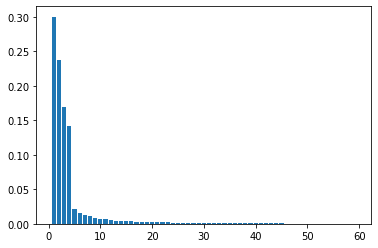

In [68]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

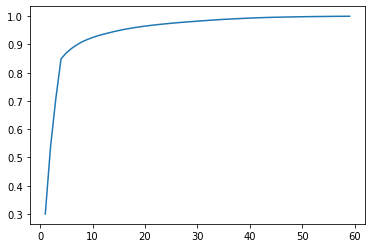

In [69]:
plt.plot(range(1,len(np.cumsum(pca.explained_variance_ratio_))+1), np.cumsum(pca.explained_variance_ratio_))

Per above graph, Approximately 40 features explain more than 90% accuracy, So let's try to build a model with 40 features.

In [70]:
pca_1 =  PCA(0.9)
X_train_2 = pca_1.fit_transform(X_train)

In [71]:
X_train_2.shape

(55999, 8)

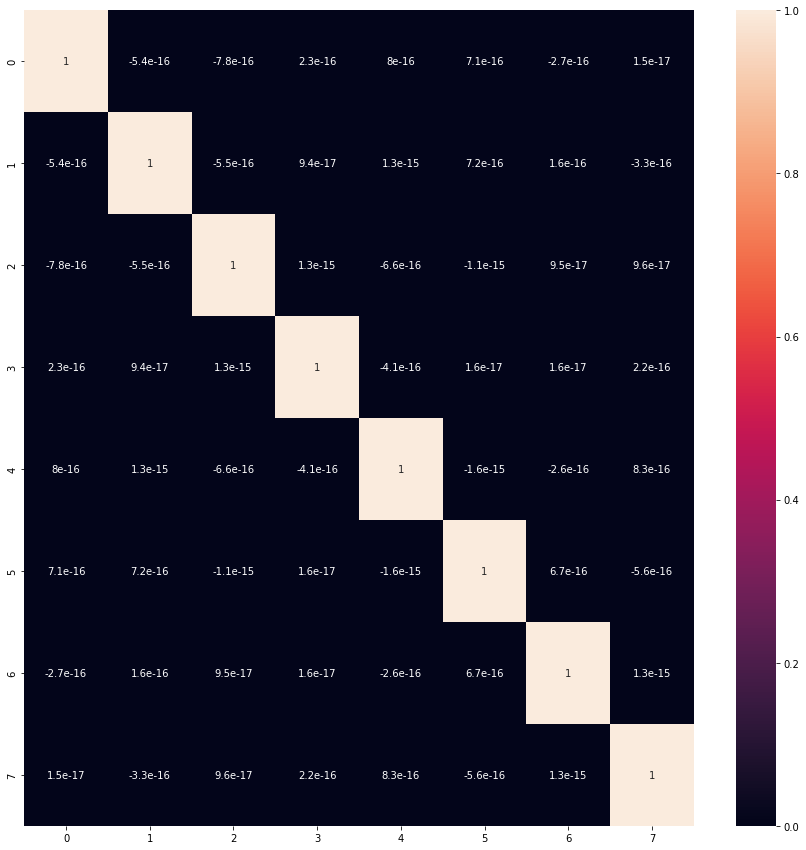

In [72]:
corrmat = np.corrcoef(X_train_2.transpose())
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)
plt.show()

In [73]:
learner_pca = LogisticRegression()

In [74]:
model_2 = learner_pca.fit(X_train_2, y_train)

#Applying PCA on test set
X_test_1 = pca_1.transform(X_test)

# Predictions
y_pred = learner_pca.predict(X_test_1)

# Converting prediction array into a DF
y_pred_df = pd.DataFrame(y_pred)
pred_probs_test_2 = model_2.predict_proba(X_test_1)[:,1]
print("{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test_2)))
print(confusion_matrix(y_test,y_pred))
print("Accuracy of the logistic regression model with PCA: ",metrics.accuracy_score(y_test,y_pred))

0.71
[[12571     3]
 [ 1418     8]]
Accuracy of the logistic regression model with PCA:  0.8985


In [75]:
cross_val_score(learner_pca, X_train_1, y_train, cv=5, n_jobs=-1)

array([0.898125  , 0.89776786, 0.89785714, 0.89848214, 0.89775873])

In [76]:
col = list(X_train.columns)
df_pca = pd.DataFrame({'PC-1':pca_1.components_[0],'PC-2':pca_1.components_[1], 'PC-3':pca_1.components_[2],'Feature':col})
df_pca.head(10)

,PC-1,PC-2,PC-3,Feature
0,-0.009153,-0.009380,0.005128,arpu_6
1,-0.028170,-0.013515,0.011381,onnet_mou_6
2,-0.027934,-0.023256,0.011096,offnet_mou_6
3,-0.001045,-0.001254,0.000600,roam_ic_mou_6
4,-0.001021,-0.000566,0.000628,roam_ic_mou_7
5,-0.001466,-0.000838,-0.000002,roam_ic_mou_8
6,-0.003549,-0.001688,0.000124,roam_og_mou_6
7,-0.003986,-0.001805,0.000874,roam_og_mou_7
8,-0.002304,-0.000930,-0.000221,roam_og_mou_8
9,-0.003167,-0.011759,0.003746,loc_og_t2t_mou_6


#### Model has an accuracy of 89%
Top 3 features
- arpu_6
- onnet_mou_6
- offnet_mou_6

### Hyper-parameter tuning

In [77]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [78]:
hyper_params = {'max_depth': range(3, 20),
                'max_features': range(10, 40),
                'min_samples_leaf': range(20, 400, 50),
                'n_estimators': range(10, 101, 10)}

model_cv = RandomizedSearchCV(estimator=rf, 
                              param_distributions=hyper_params,
                              verbose=1,
                              cv=5,
                              return_train_score=True,
                              n_jobs=-1,
                              n_iter=50)

In [79]:
#model_cv.fit(X_train, y_train)
## I could not run this model on my laptop, Tried for several hours but failed, I will go ahead and consider the previous model for evaluation

### RandomizedSearchCV

In [80]:
hyper_parameters = {'min_samples_leaf': range(20,100,10),
                    'n_estimators': range(20,50,10),
                    'max_features': range(11,25)    
}

In [81]:
rf = RandomForestClassifier(max_depth=12, random_state=42, n_jobs=-1)

In [82]:
model_cv2 =  RandomizedSearchCV(estimator=rf, 
                              param_distributions=hyper_parameters,
                              verbose=1,
                              cv=5,
                              return_train_score=True,
                              n_jobs=-1,
                              n_iter=50)

In [84]:
%%time
model_cv2.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 23.3min finished


Wall time: 23min 27s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=12, n_jobs=-1,
                                                    random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_features': range(11, 25),
                                        'min_samples_leaf': range(20, 100, 10),
                                        'n_estimators': range(20, 50, 10)},
                   return_train_score=True, verbose=1)

In [85]:
model_cv2.best_score_

0.9386239077468652

In [86]:
model_cv2.best_estimator_

RandomForestClassifier(max_depth=12, max_features=17, min_samples_leaf=20,
                       n_estimators=30, n_jobs=-1, random_state=42)

In [87]:
rf_best = model_cv2.best_estimator_

In [88]:
model_cv2.best_estimator_.feature_importances_

array([9.28160823e-03, 8.62854153e-03, 6.37130424e-03, 2.83935609e-03,
       1.04099730e-02, 1.57136579e-01, 3.94429595e-03, 1.28765840e-02,
       2.04157428e-01, 4.18830425e-03, 7.92798464e-03, 3.11413548e-03,
       2.10334465e-03, 2.10673338e-03, 3.09434522e-02, 5.45594696e-04,
       4.71012842e-04, 2.23543658e-03, 4.66903359e-03, 2.43941070e-02,
       2.32914917e-03, 5.26374802e-03, 1.01563913e-02, 6.54519366e-03,
       2.82661193e-03, 3.26915068e-03, 2.45868232e-02, 3.47986225e-03,
       3.70825763e-03, 6.32620588e-04, 8.03190342e-04, 2.93855229e-03,
       5.76012124e-02, 1.31931556e-03, 1.54802574e-03, 8.37070658e-04,
       3.35389063e-02, 6.77649501e-03, 1.40619313e-02, 4.23325606e-03,
       1.01377449e-02, 1.57535808e-01, 2.73482566e-03, 3.33792989e-03,
       7.36224975e-02, 9.36848786e-04, 1.57649089e-03, 8.85358158e-03,
       8.57034371e-04, 4.15847310e-03, 4.08368409e-04, 1.61201078e-04,
       1.85995188e-02, 1.64310881e-03, 5.70035995e-04, 2.45980188e-04,
      

In [89]:
y_test_pred = rf_best.predict(X_test)

In [91]:
metrics.accuracy_score(y_test, y_test_pred)

0.9323571428571429

In [92]:
confusion_matrix(y_test, y_test_pred)

array([[12390,   184],
       [  763,   663]], dtype=int64)

In [83]:
abc

NameError: name 'abc' is not defined

### Applying the changes on test set

In [101]:
test_data = pd.read_csv('test.csv')   #Load testdata

test_data[["date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8"]] = test_data[["date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8"]].apply(pd.to_datetime)

test_data["day_of_last_rech_6"] = test_data['date_of_last_rech_6'].dt.day
test_data["day_of_last_rech_7"] = test_data['date_of_last_rech_7'].dt.day
test_data["day_of_last_rech_8"] = test_data['date_of_last_rech_8'].dt.day

cols = X_train.columns

test_data_1 = test_data.loc[:,cols]

for col in cols:
    test_data_1[col].fillna(test_data_1[col].mean(), inplace = True) 

In [102]:
test_data_1[cols] = scaler.transform(test_data_1[cols])

In [103]:
#Downloading the submission file to local
y_predicted = rf_best.predict(test_data_1)
submission = pd.DataFrame({"id":test_data['id'],"churn_probability":y_predicted})
submission
#submission.to_csv('Telecom_churn_submissione1.csv',index = False)

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0
...,...,...
29995,99994,0
29996,99995,0
29997,99996,0
29998,99997,0


In [104]:
submission.to_csv('Submission.csv',index = False)

### Summary

<AxesSubplot:>

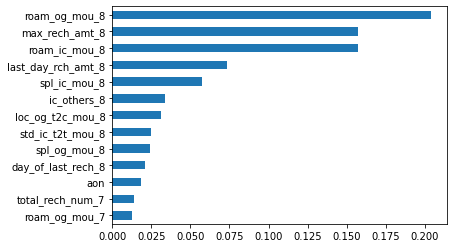

In [105]:
X = train_data
features = X.columns.values
X.loc[:, df_train.columns != 'churn_probability'] = pd.DataFrame(scaler.transform(X.loc[:, df_train.columns != 'churn_probability']))
X.columns = features


importances = model_cv2.best_estimator_.feature_importances_
weights = pd.Series(importances,
                 index=X.loc[:, df_train.columns != 'churn_probability'] .columns.values)
weights.sort_values()[-13:].plot(kind = 'barh')

- Month 8 parameters are strong indicators of churn
- Top 3 parameters for churn
    - roam_og_mou_8
    - max_rech_amt_8
    - roam_ic_mou_8